**Лабораторная работа 2.1.6**

Эффект Джоуля-Томсона

In [35]:
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt

In [36]:
# const

S_U = 0.0005e-3     # Погрешность вольтметра, В
S_P = 2941.985 / 2  # Погрешность манометра, Па
U_0 = 0.0025e-3     # Начальное показание вольтмертра, В
d = 2941.995 * 2    # Цена большого деление манометра, В
atm = 101325        # Паскалей в атмосфере

In [37]:
# Функции

def U_to_ΔT (U, T):
    if 20 <= T and T < 30:
        return (U / 40.7e-6)
    elif 30 <= T < 40:
        return (U / 41.5e-6)
    
def Pd_to_ΔP (Pd):
    return (Pd * d)

def min_sqrt(X, Y):
    k = ( ( np.mean(X * Y) - np.mean(X) * np.mean(Y) ) /
         ( np.mean(X ** 2) - np.mean(X) ** 2 ) )
    b = np.mean(Y) - k * np.mean(X)
    s_k = 1 / sqrt(len(X)) * sqrt(abs( ( np.mean(Y ** 2) - np.mean(Y) ** 2 ) /
                                  ( np.mean(X ** 2) - np.mean(X) ** 2 ) - k ** 2))
    s_b = s_k * sqrt(np.mean(X ** 2) - np.mean(X) ** 2)
    
    return (k, b, s_k, s_b)

In [38]:
# Измерение 1

T_1 = 20.32  -0.125

Pd_1 = np.array([69, 60, 52, 43, 34, 26]) * -1
U_1 = np.array([-0.1765, -0.1495, -0.125, -0.0965, -0.0685, -0.044]) * 1e-3 - U_0

E_U_1 = S_U / U_1

ΔP_1 = Pd_to_ΔP(Pd_1)
ΔT_1 = U_to_ΔT(U_1, T_1)

S_T_1 =  ΔT_1 * E_U_1

In [39]:
# Измерение 2

T_2 = 30

Pd_2 = np.array([69, 60, 52, 43, 34, 26]) * -1
U_2 = np.array([-0.1675, -0.1395, -0.1175, -0.091, -0.065, -0.044]) * 1e-3 - U_0

E_U_2 = S_U / U_2

ΔP_2 = Pd_to_ΔP(Pd_2)
ΔT_2 = U_to_ΔT(U_2, T_2)

S_T_2 =  ΔT_2 * E_U_2

In [40]:
# Измерение 3

T_3 = 37

Pd_3 = np.array([69, 60, 52]) * -1
U_3 = np.array([-0.1635, -0.137, -0.111]) * 1e-3 - U_0

E_U_3 = S_U / U_3

ΔP_3 = Pd_to_ΔP(Pd_3)
ΔT_3 = U_to_ΔT(U_3, T_3)

S_T_3 =  ΔT_3 * E_U_3

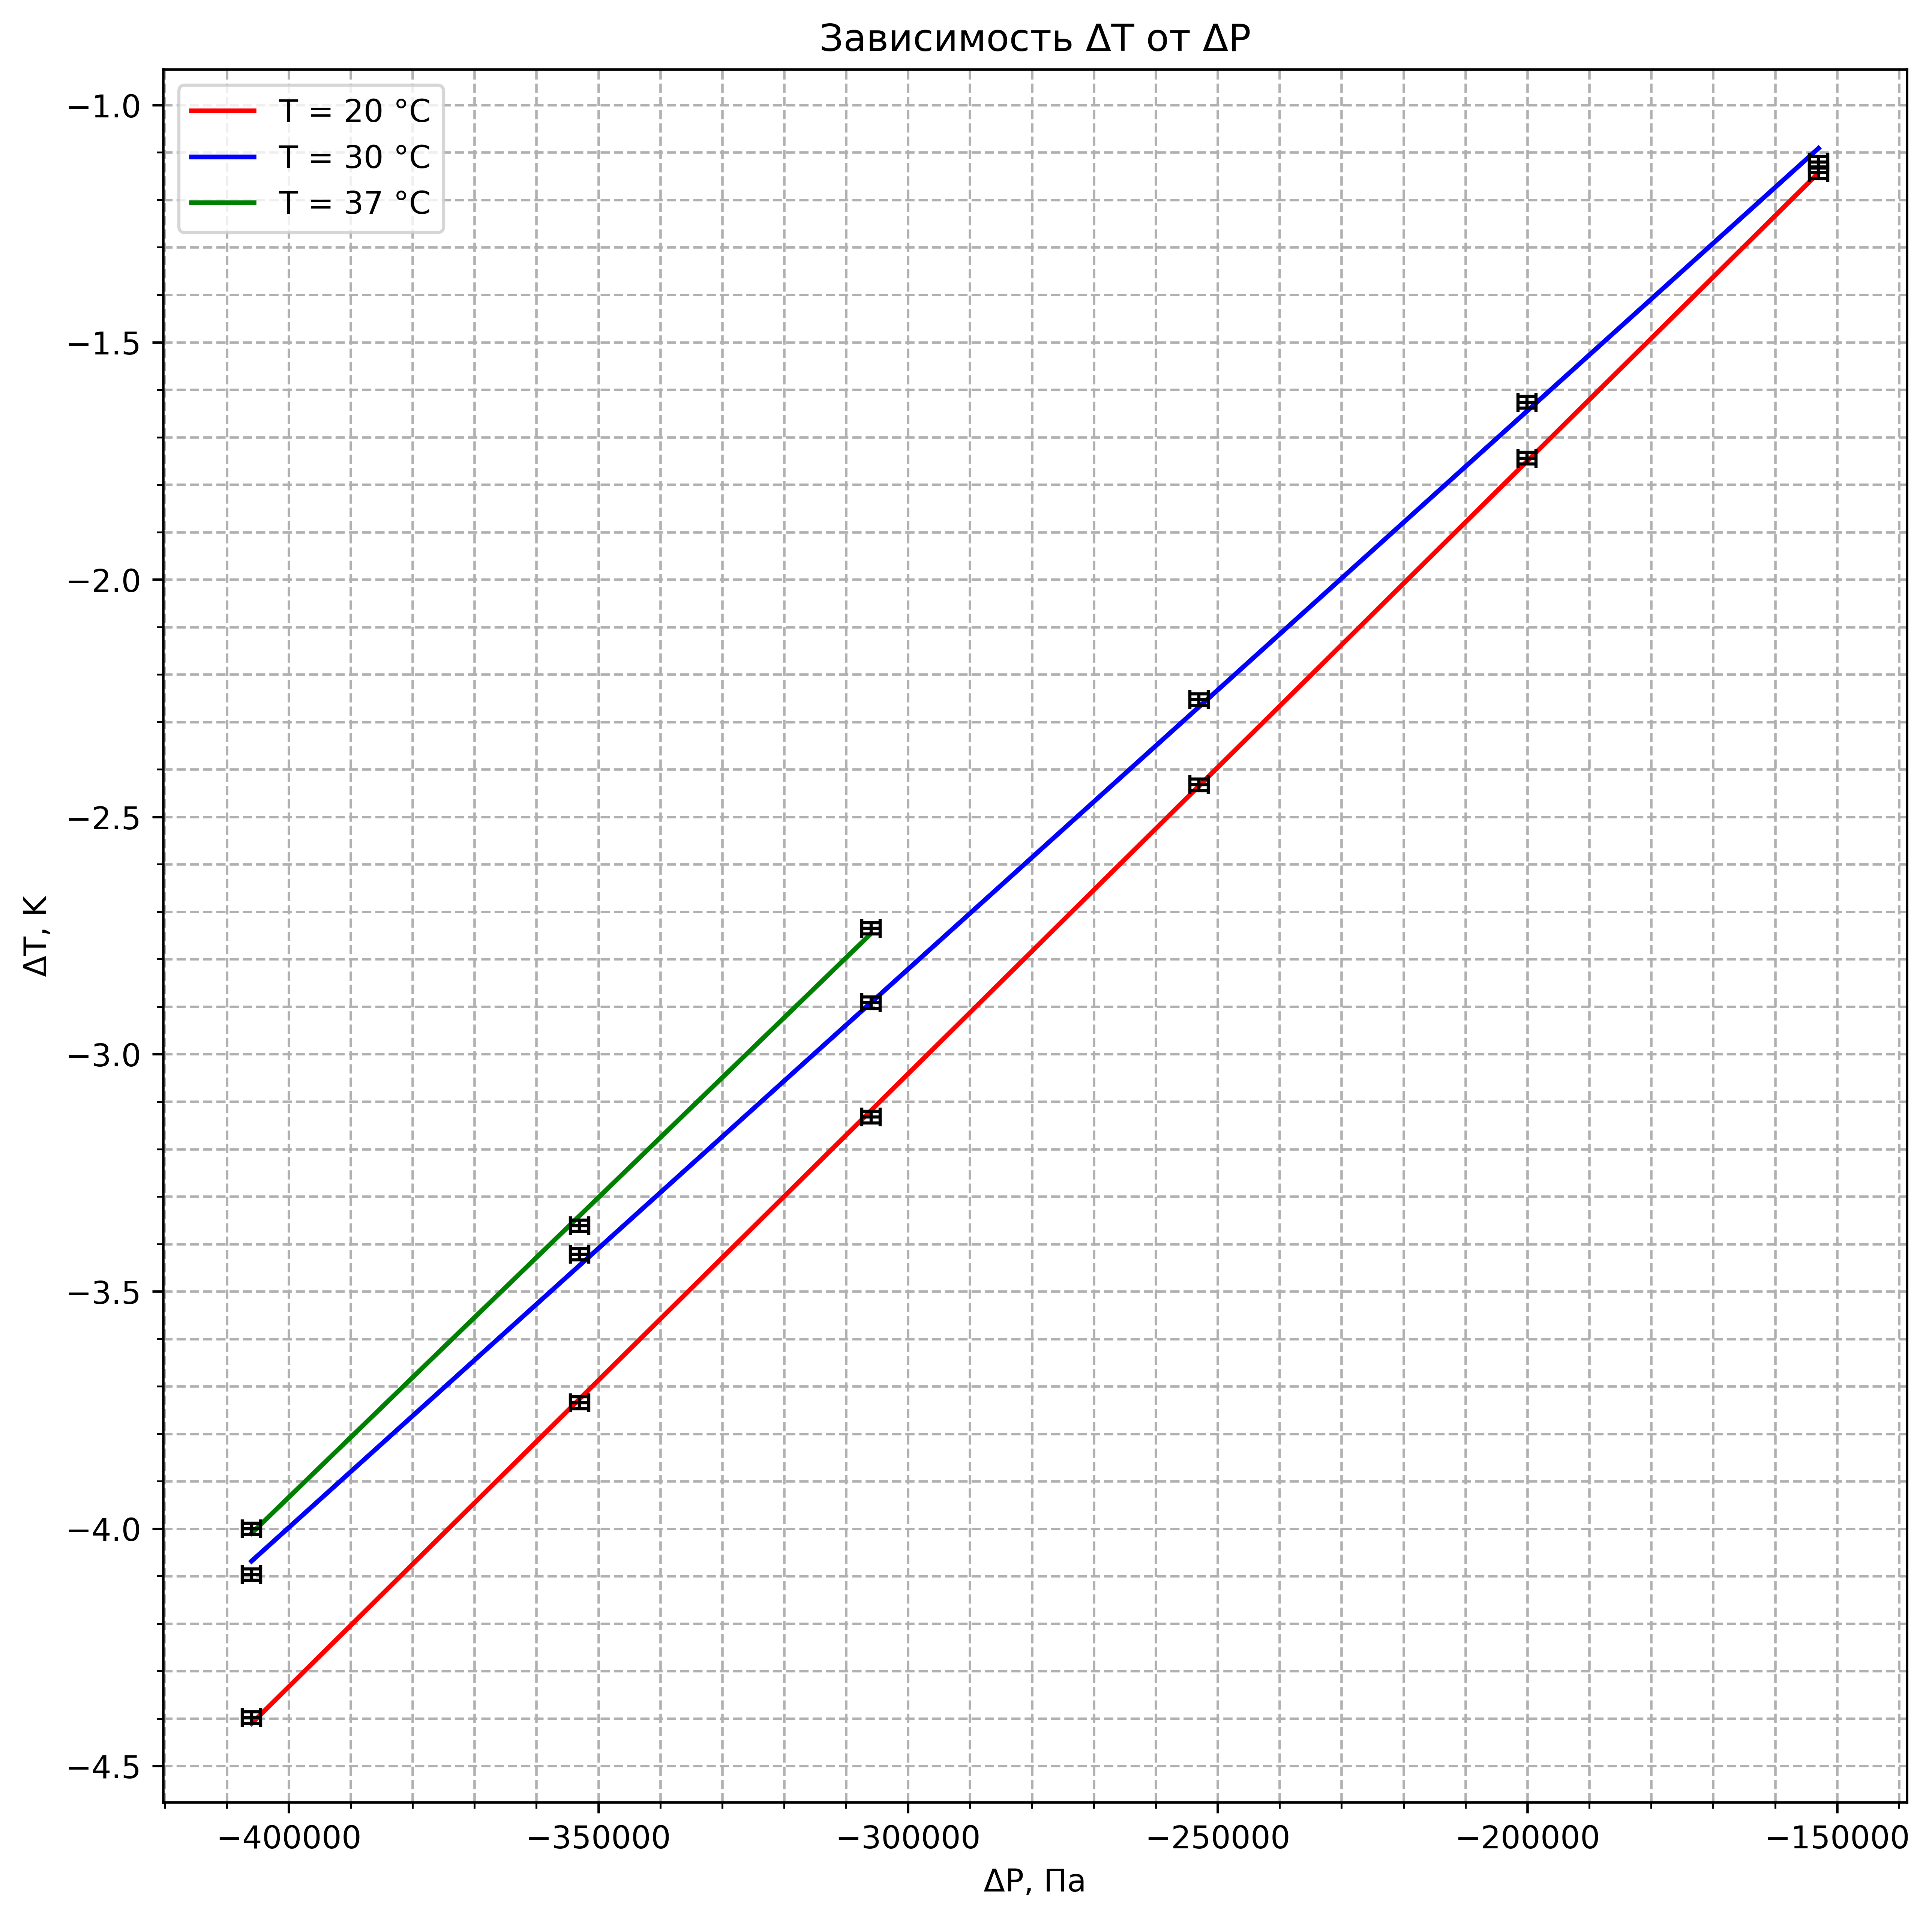

In [41]:
# Построение графика зависимости ΔT от ΔP

fig, ax = plt.subplots(figsize=(10,10), dpi=600)
ax.minorticks_on()
ax.grid(which='both', linestyle='--')
ax.set_title('Зависимость ΔT от ΔP')
ax.set_xlabel('ΔP, Па')
ax.set_ylabel('ΔT, K')

ax.errorbar(ΔP_1, ΔT_1, fmt='none', linewidth=0, markersize=5, elinewidth=1,
            xerr=S_P, yerr=S_T_1,capsize=3, zorder=3, color='black')
(k_1, b_1, s_k_1, s_b_1) = min_sqrt(ΔP_1, ΔT_1)
ax.plot(ΔP_1, k_1 * ΔP_1 + b_1, color='red', label = 'T = 20 °C')


ax.errorbar(ΔP_2, ΔT_2, fmt='none', linewidth=0, markersize=5, elinewidth=1,
            xerr=S_P, yerr=S_T_2,capsize=3, zorder=3, color='black')
(k_2, b_2, s_k_2, s_b_2) = min_sqrt(ΔP_2, ΔT_2)
ax.plot(ΔP_2, k_2 * ΔP_2 + b_2, color='blue', label = 'T = 30 °C')

ax.errorbar(ΔP_3, ΔT_3, fmt='none', linewidth=0, markersize=5, elinewidth=1,
            xerr=S_P, yerr=S_T_3,capsize=3, zorder=3, color='black')
(k_3, b_3, s_k_3, s_b_3) = min_sqrt(ΔP_3, ΔT_3)
ax.plot(ΔP_3, k_3 * ΔP_3 + b_3, color='green', label = 'T = 37 °C')

ax.legend()

In [42]:
K = np.array([k_1, k_2, k_3]) * atm
SK = np.array([s_k_1, s_k_2, s_k_3]) * atm
T = np.array([T_1, T_2, T_3])
for i in range(3):
    print ('k_' + str(i + 1) + ' = ' + str(K[i]) + ' +- ' + str(SK[i])  )

k_1 = 1.308601978872401 +- 0.004188918333073449
k_2 = 1.1922671574769979 +- 0.01025622307069047
k_3 = 1.2802283412905489 +- 0.021034371552182223


Видно, что измерение 3 проведено некорректно. Удалим его.

In [43]:
K = K[0:2]
SK = SK[0:2]
T = T[0:2]
Te_1 = 1 / T

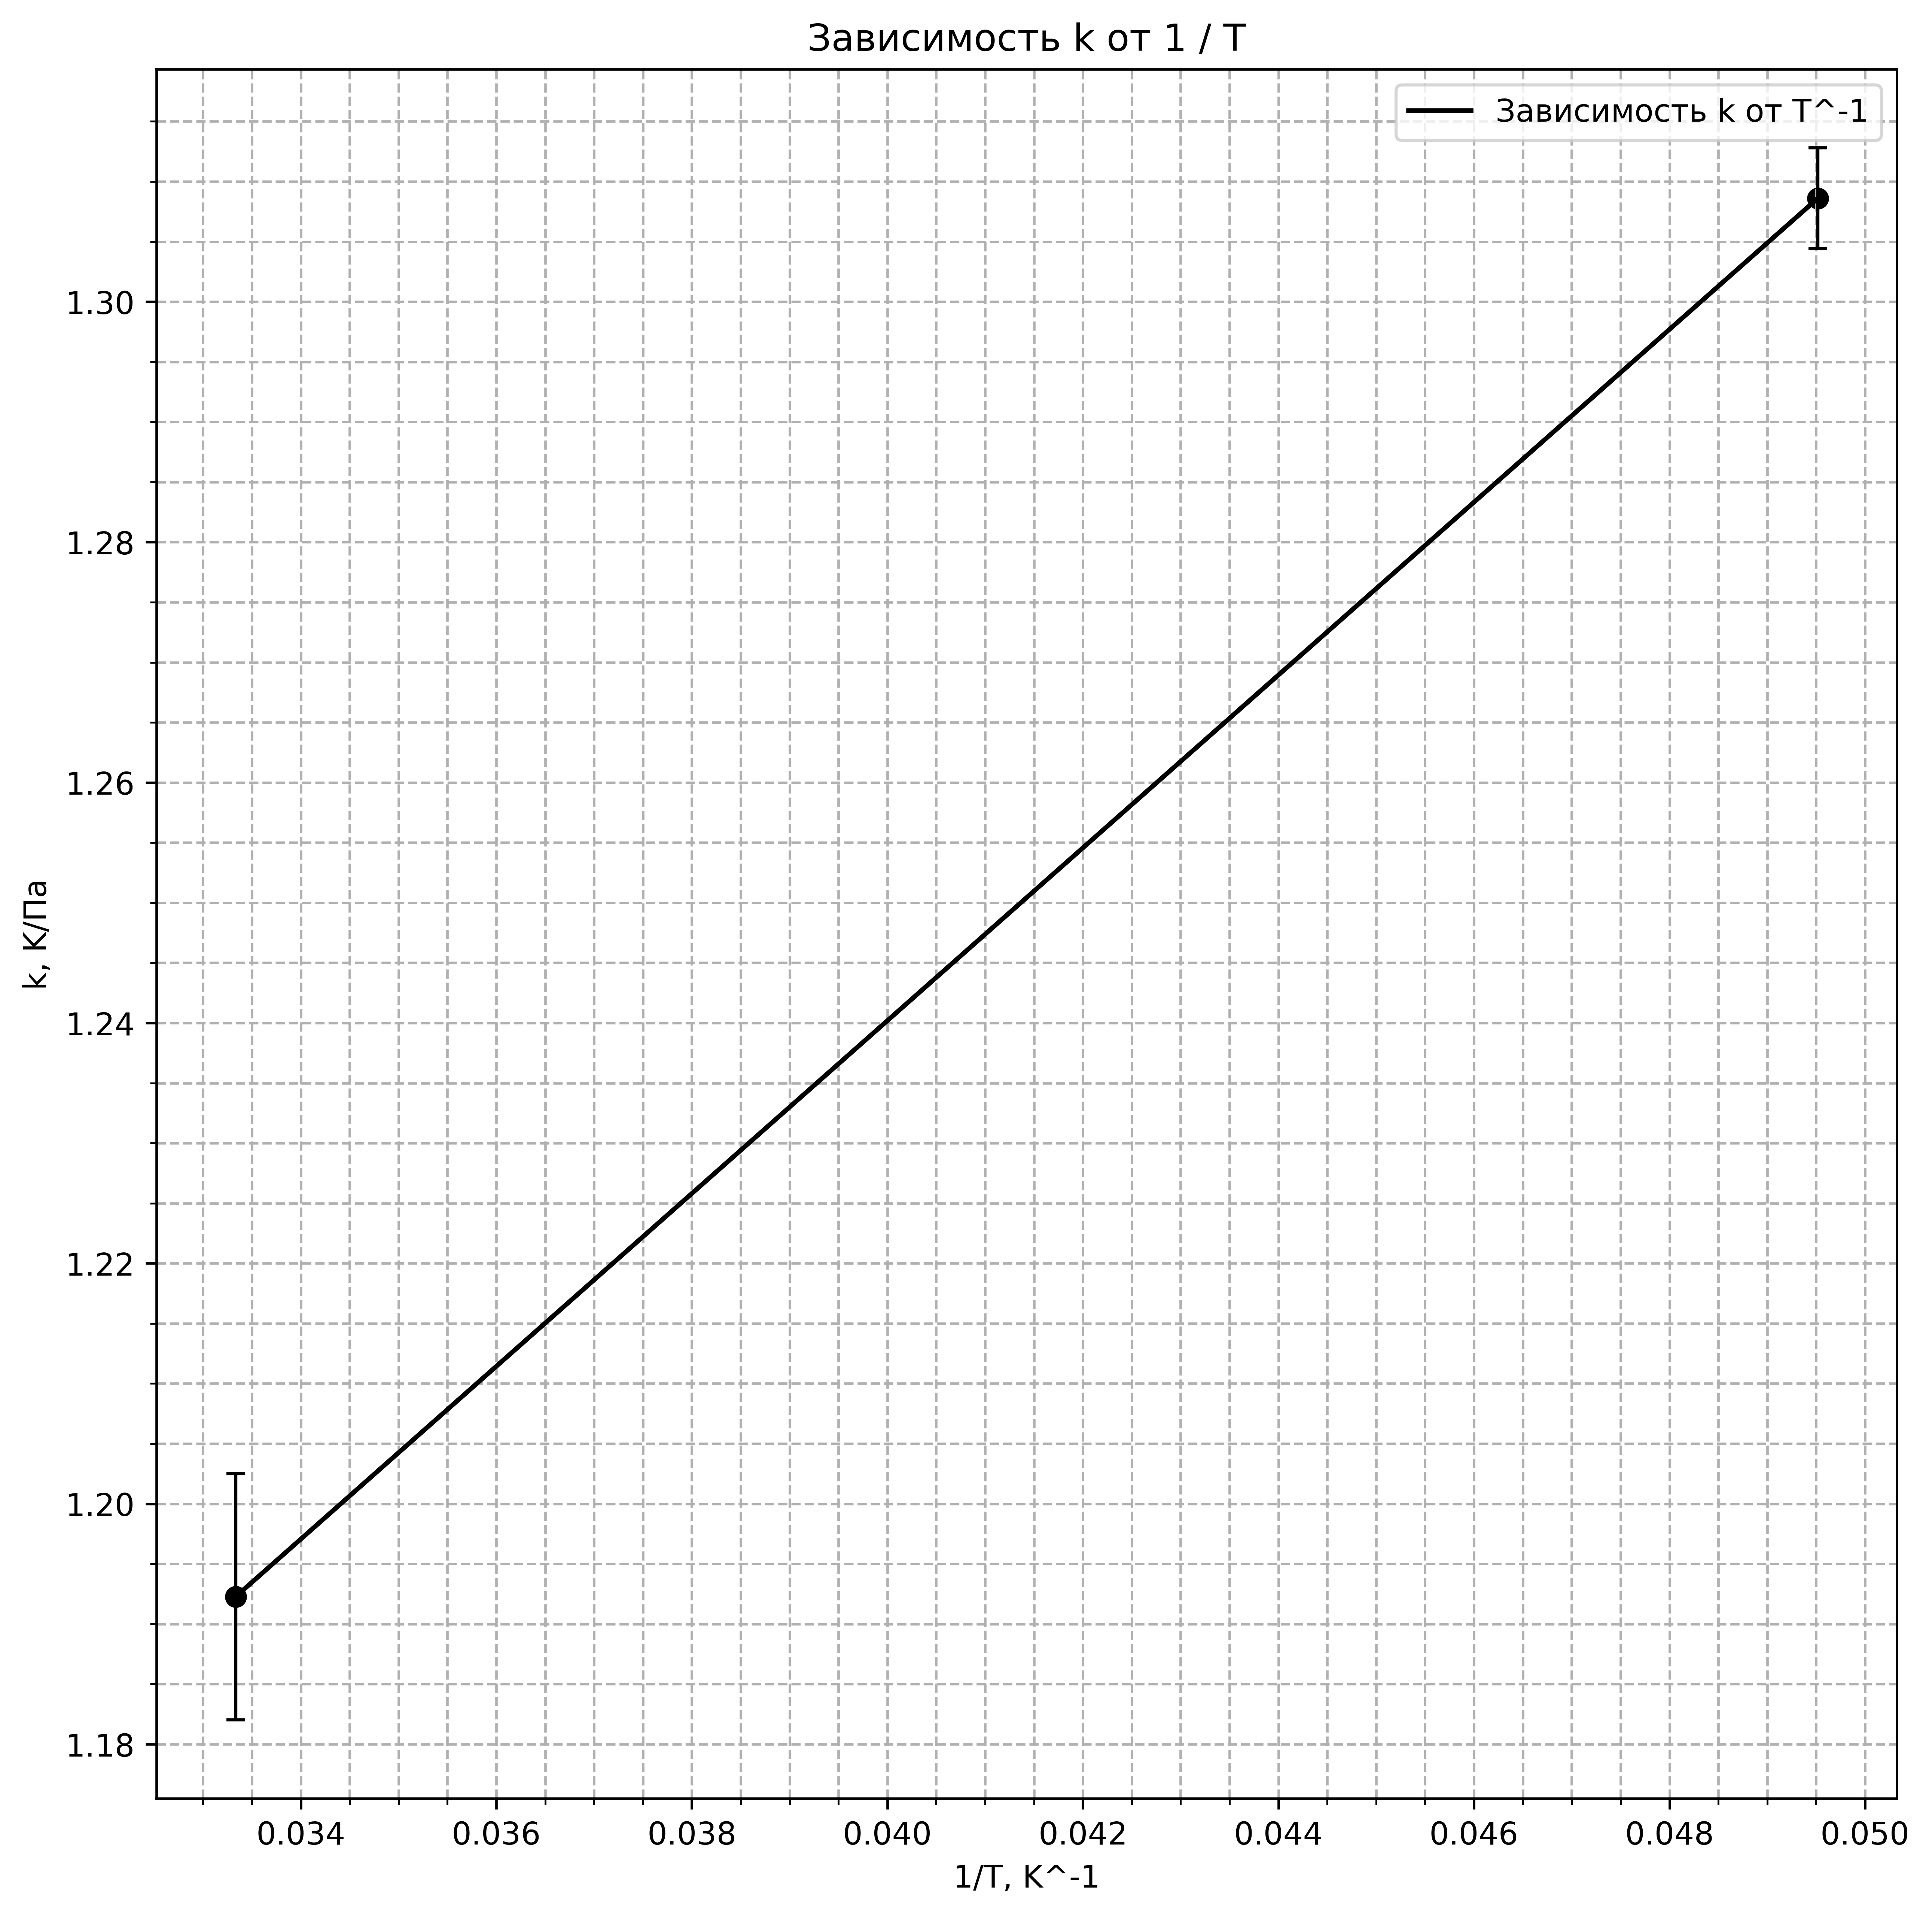

In [44]:
# Построение графика зависимости k от ΔP

ax.clear()

fig, ax = plt.subplots(figsize=(10,10), dpi=600)
ax.minorticks_on()
ax.grid(which='both', linestyle='--')
ax.set_title('Зависимость k от 1 / T')
ax.set_xlabel('1/T, K^-1')
ax.set_ylabel('k, K/Па')

ax.errorbar(Te_1, K, fmt='none', linewidth=0, markersize=5, elinewidth=1,
            xerr=0, yerr=SK, capsize=3, zorder=3, color='black')
(k_4, b_4, s_k_4, s_b_4) = min_sqrt(Te_1, K)
ax.scatter(Te_1, K, color='black')
ax.plot(Te_1, k_4 * Te_1 + b_4, color='black', label = 'Зависимость k от T^-1')
ax.legend()